In [1]:
# train.ipynb

In [2]:
from glynet import *

**GlyNet50** is deep neural network with 50 outputs for 50 different proteins.  
It takes encoded IUPAC strings of glycans as inputs.  
The library comes with high-level functions which can:
* Prepare the data with transformations and cutoffs.
* Perform cross-validation on the data with the given hyperparameters.
* Make a bar chart showing the r-squared for all the proteins.
* Make a scatter plot for each protein showing predictions vs ground-truth.

In [3]:
data = get_data(transformation = np.cbrt, cutoff = 1.0)
proteins = list(data.columns[1:])
data.head()

,IUPAC,AAA,AAL,ABA,ACL,AIA,AMA,AOL,BPL,CAA,...,SNA,STA,TJA,TL,UDA,UEA,VGA,VVL,WFL,WGA
0,Gal(a1-Sp8,4.372858,4.167230,11.961571,2.139711,21.991218,4.239280,4.283983,2.239729,3.885891,...,4.997460,4.207602,3.703668,1.000000,2.142846,1.0,4.903597,4.222035,2.376969,7.461575
1,Glc(a1-Sp8,5.920529,3.816098,12.437614,2.167011,1.000000,3.767102,4.050202,2.292355,3.085994,...,6.461637,3.116482,5.832524,1.000000,2.746133,1.0,5.367763,3.315473,1.980999,7.520612
2,Man(a1-Sp8,4.391430,2.661648,9.542767,2.169314,1.000000,4.571336,4.120613,3.204097,2.252729,...,6.279191,3.448673,4.214564,2.550254,2.670529,1.0,3.471939,3.379915,2.692877,6.133126
3,GalNAc(a1-Sp8,4.667372,2.100263,5.055442,13.607672,31.486598,1.858734,2.866164,23.956914,1.820443,...,3.597608,2.372793,3.050818,1.150529,1.741230,1.0,3.958229,33.314936,30.684647,24.644268
4,GalNAc(a1-Sp15,3.762482,3.430544,3.388678,2.124570,19.338650,3.519719,3.630171,8.424235,3.442724,...,1.000000,2.141957,3.097587,1.433175,2.742227,1.0,4.691258,30.653437,26.789213,5.192208


fold 1 held out
train_loss: 6.6498
test_loss: 23.0422
r-squared: 0.4549


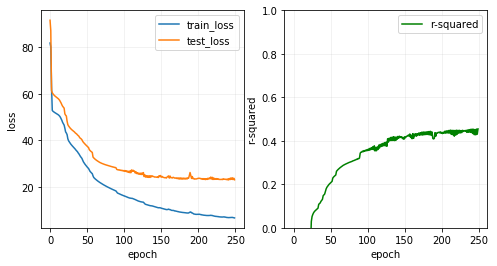

fold 2 held out
train_loss: 6.766
test_loss: 21.2012
r-squared: 0.4524


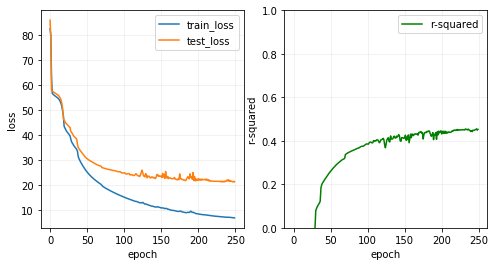

fold 3 held out
train_loss: 6.1341
test_loss: 23.0388
r-squared: 0.402


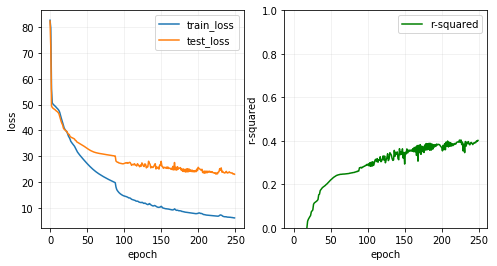

fold 4 held out
train_loss: 6.4133
test_loss: 21.0721
r-squared: 0.4367


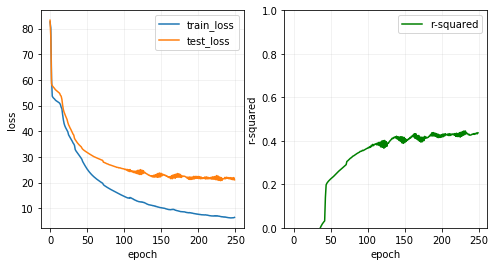

fold 5 held out
train_loss: 7.1186
test_loss: 26.6079
r-squared: 0.4977


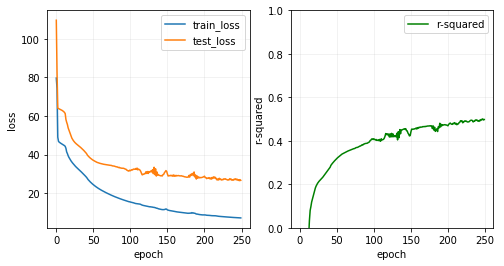

fold 6 held out
train_loss: 6.1643
test_loss: 23.2647
r-squared: 0.4997


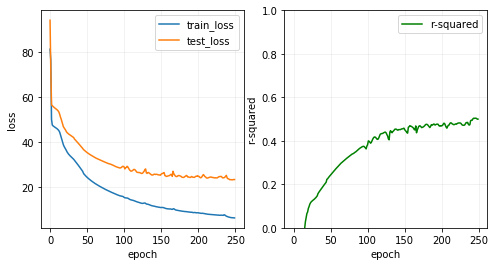

fold 7 held out
train_loss: 12.9039
test_loss: 29.8863
r-squared: 0.3282


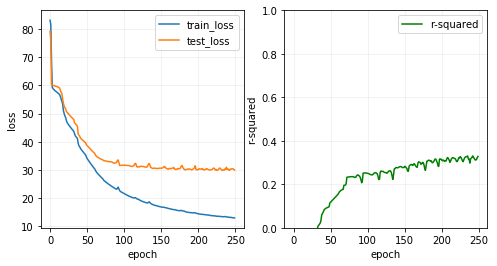

fold 8 held out
train_loss: 6.9219
test_loss: 26.9985
r-squared: -0.2975


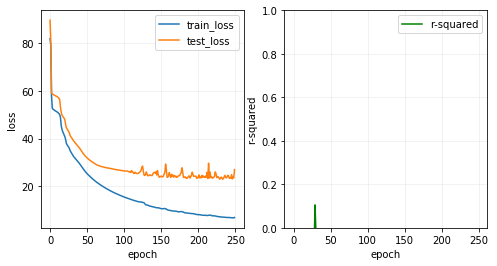

fold 9 held out
train_loss: 6.1641
test_loss: 22.3439
r-squared: 0.4641


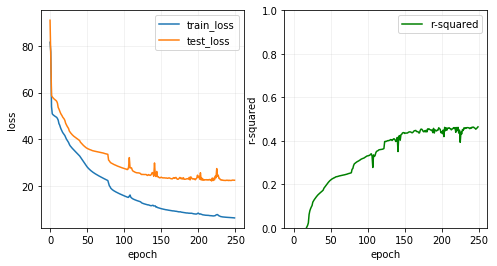

fold 10 held out
train_loss: 6.0649
test_loss: 23.6488
r-squared: 0.4008


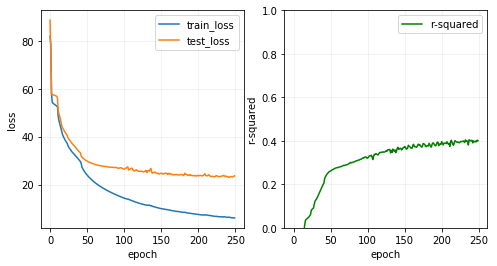

finished training. 



In [4]:
epochs = 250
lr = 0.01
batch_size = 16
n_hidden = 400

actual, predicted, glycans = train(data, proteins, epochs, lr, batch_size, n_hidden)

In [8]:
def make_results(data, actual, predicted, glycans, experiment, path, proteins, save = True):
    """Makes the results CSV in path with experiment name."""
    data = data.sort_index()
    results = pd.DataFrame()
    results['glycans'] = glycans
    actual_tensor = torch.tensor(actual).float()
    predicted_tensor = torch.tensor(predicted)
    for i in range(len(proteins)):
        results[proteins[i] + ' actual'] = actual_tensor[:, i]
        results[proteins[i] + ' predicted'] = predicted_tensor[:, i]
    results['index'] = results['glycans'].map(dict(zip(data['IUPAC'], data.index)))
    results = results.sort_values('index')
    del results['index']
    if save:
        results.to_csv(path + experiment + '.csv', index = False)
    return results

In [9]:
path = './results/'
experiment = 'glynet50_lr' + str(lr) + '_epochs' + str(epochs) + '_bs' + str(batch_size) + '_nh' + str(n_hidden)

results = make_results(data, actual, predicted, glycans, experiment, path, proteins, save = True)

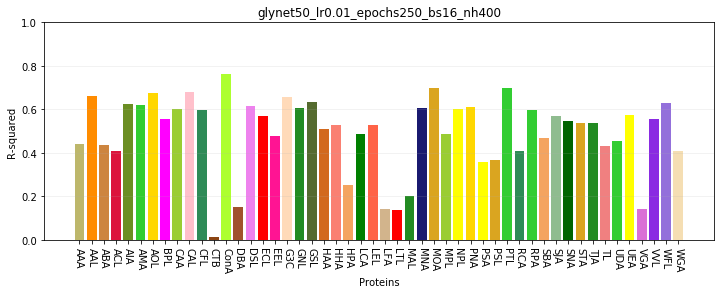

In [10]:
plot_all(results, experiment, proteins, filename = path + experiment + '.pdf')

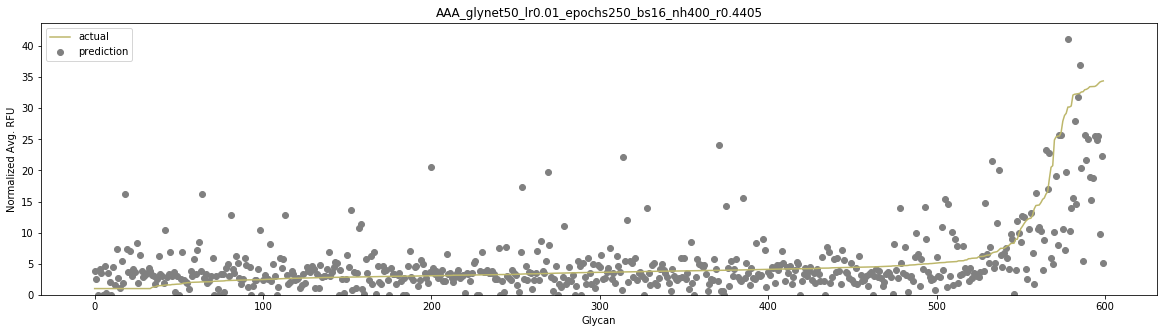

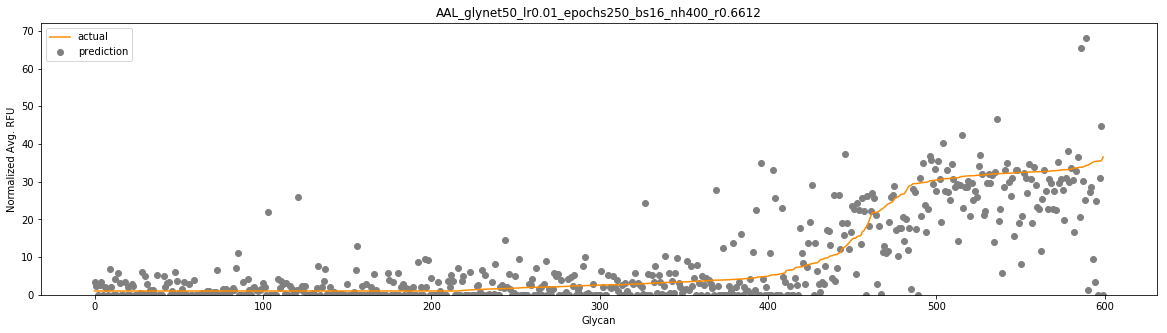

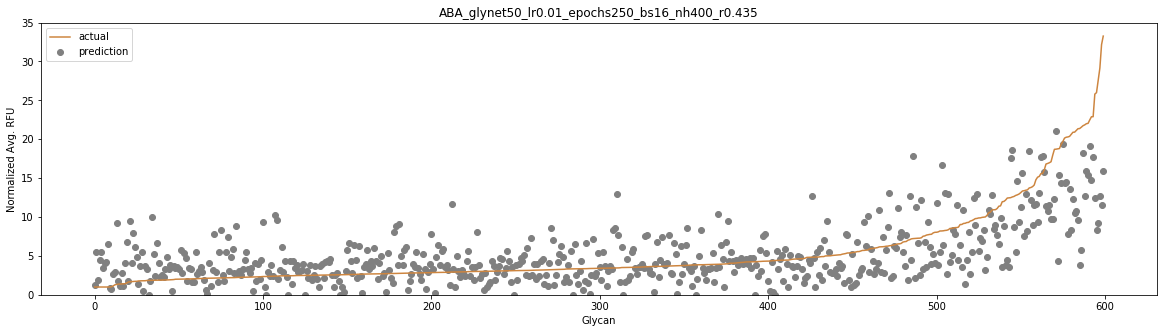

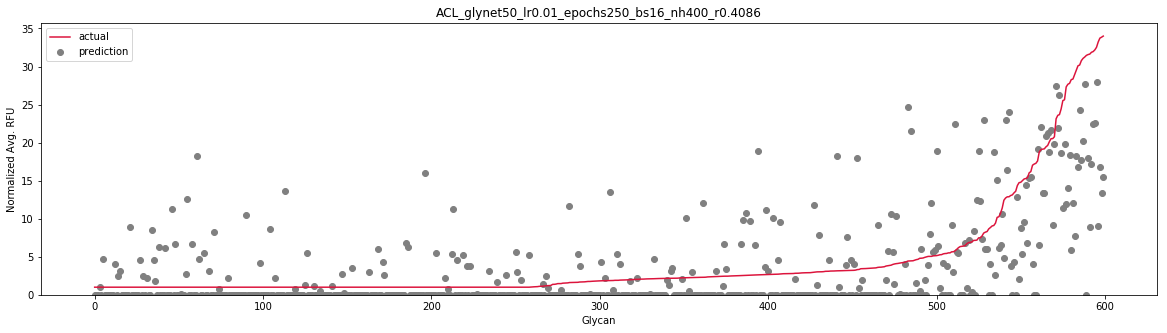

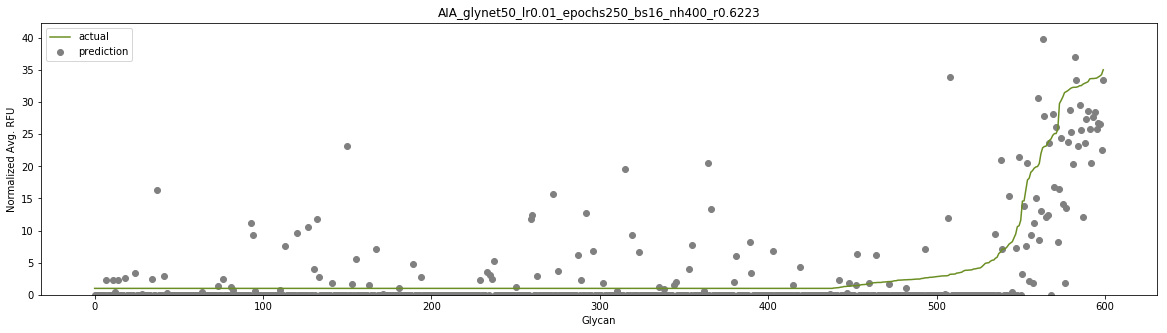

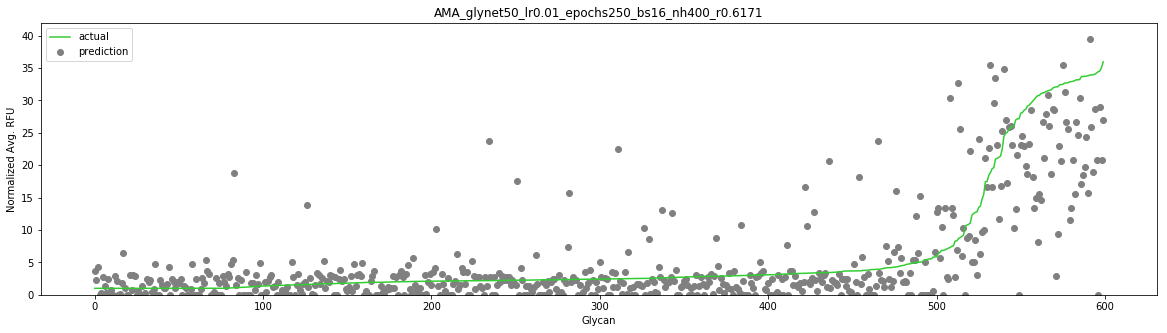

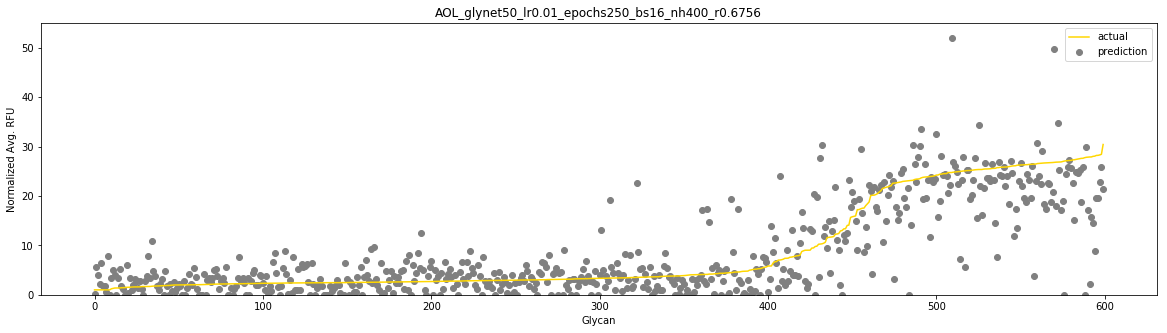

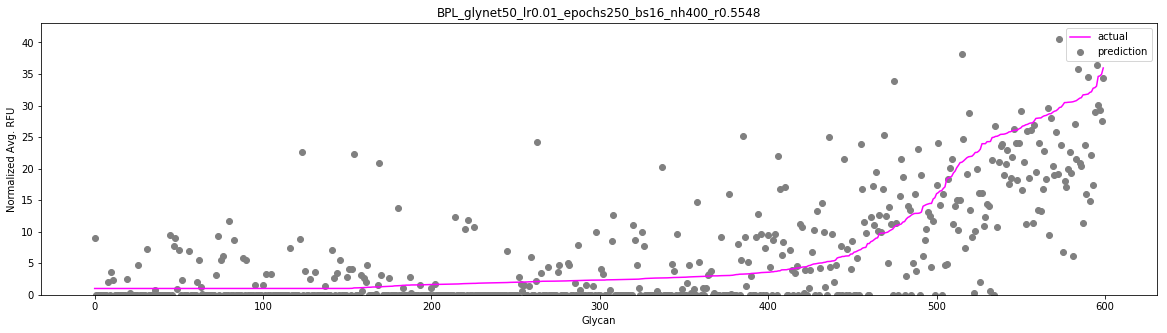

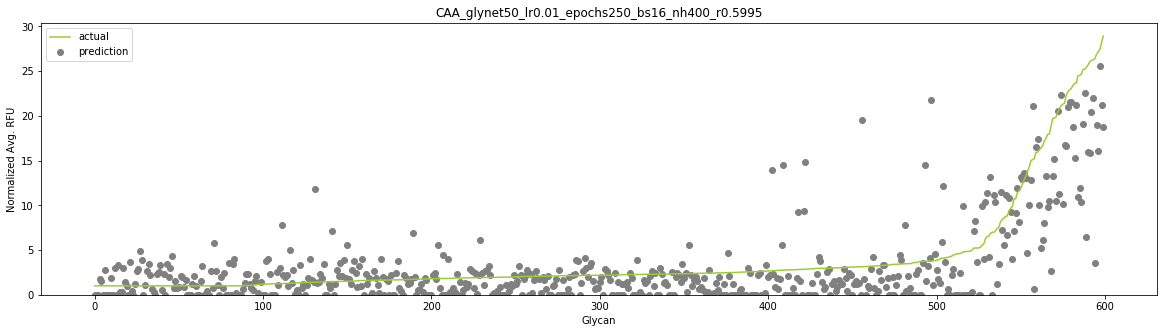

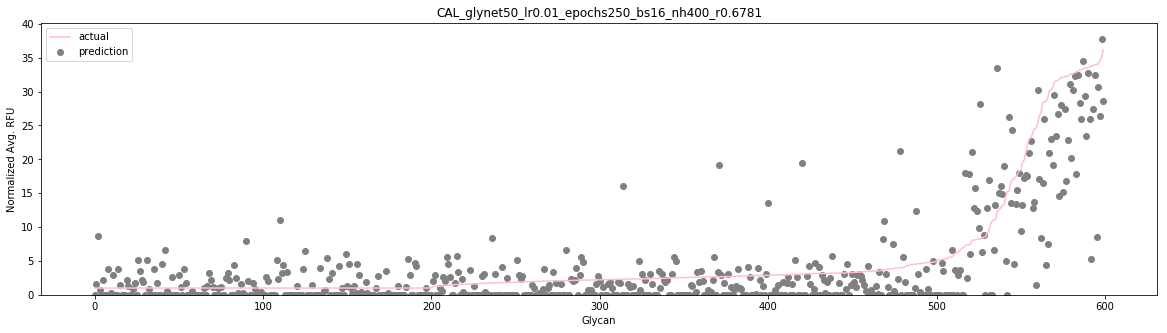

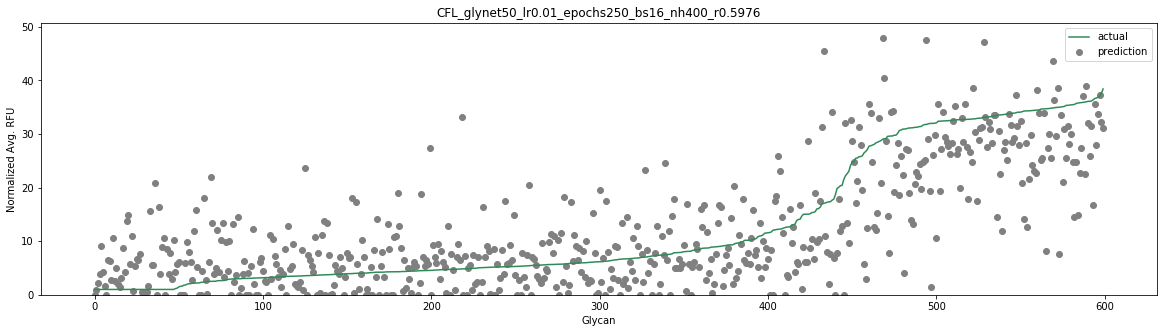

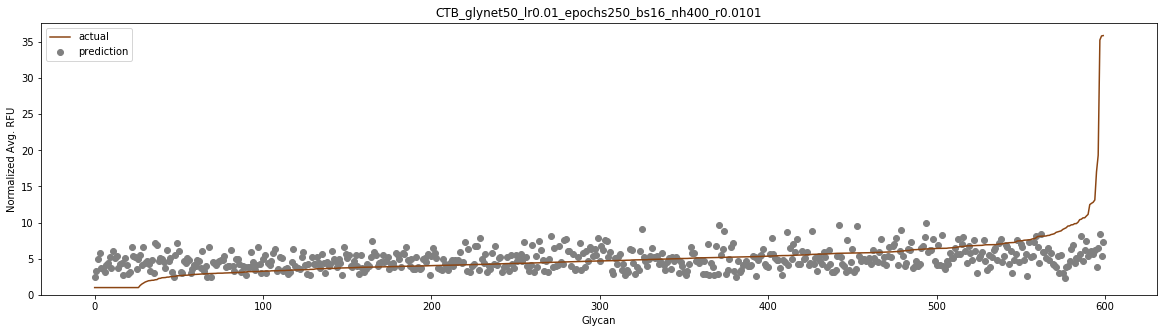

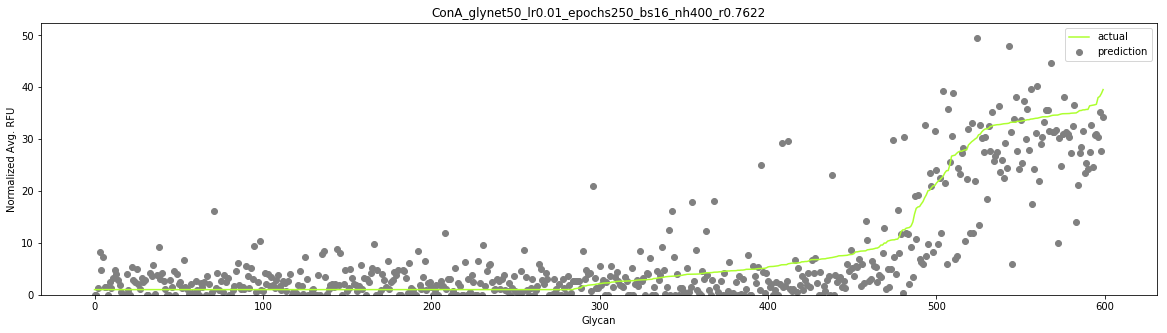

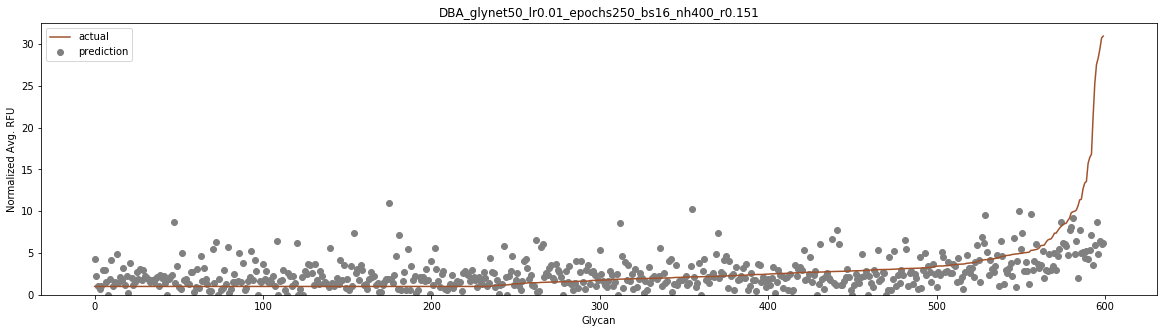

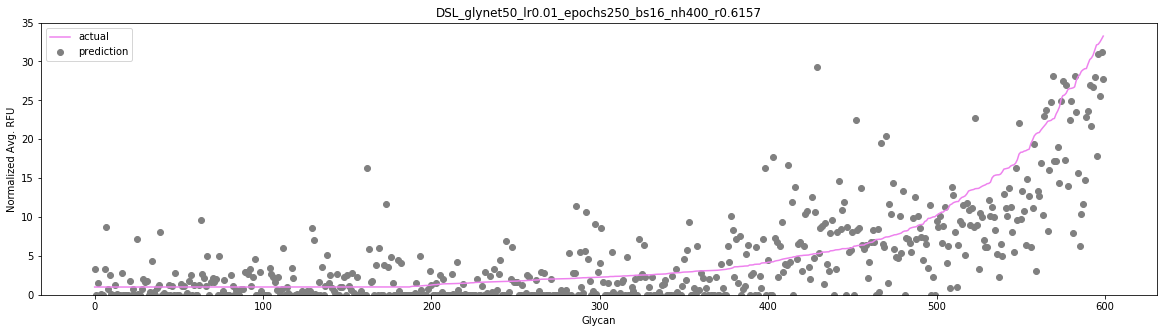

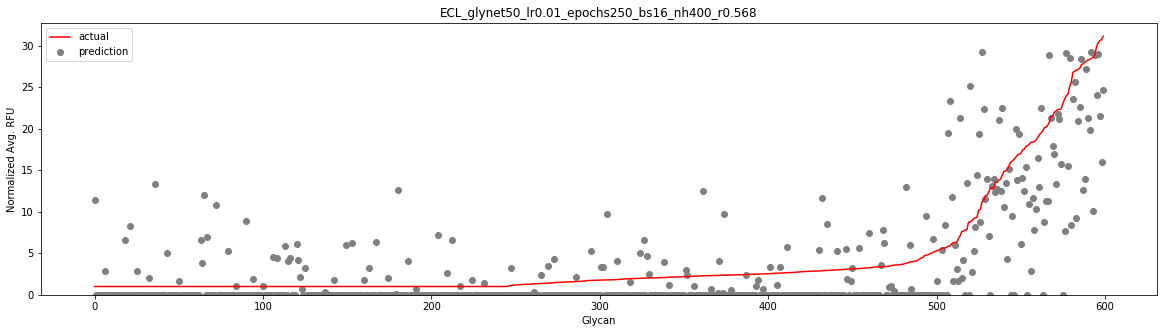

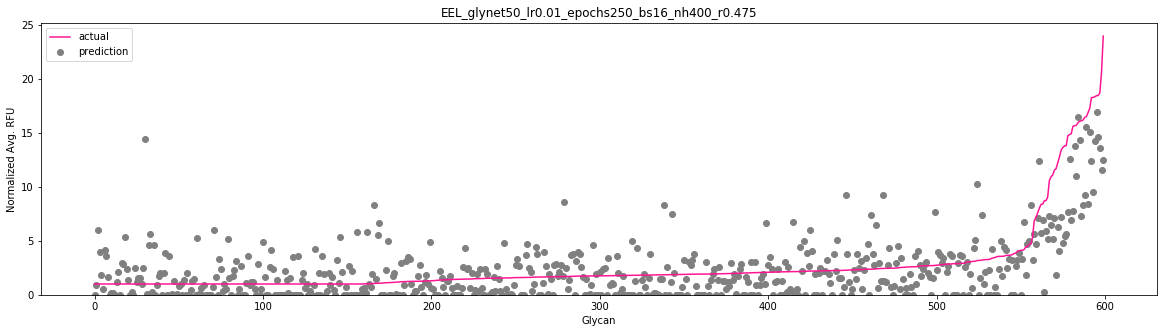

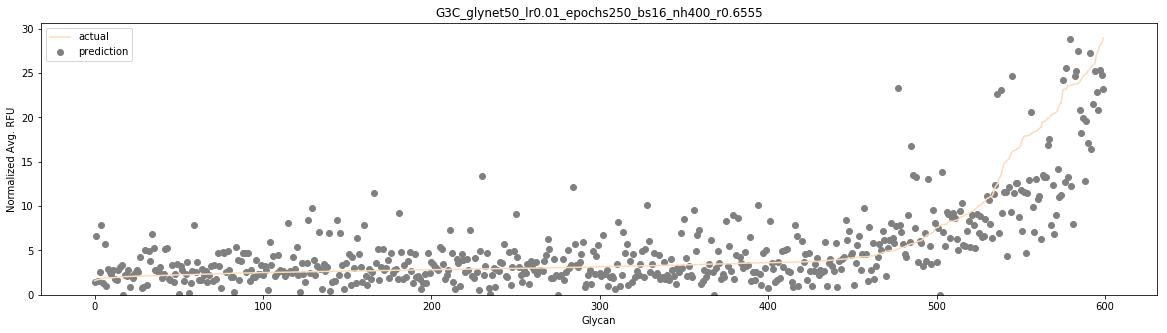

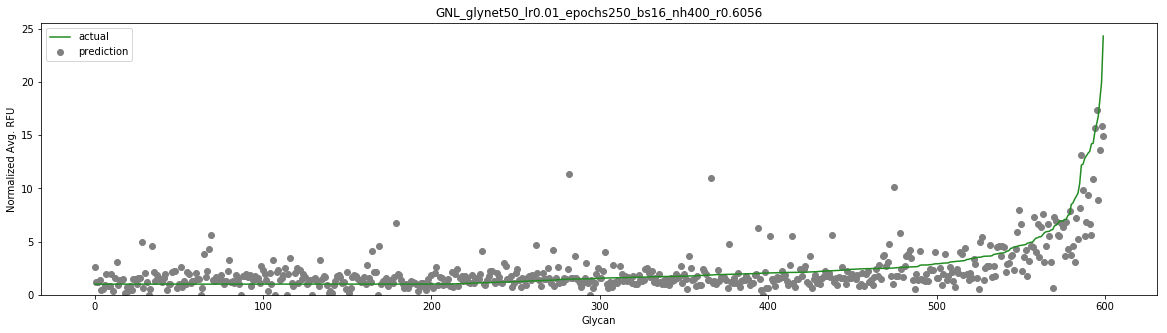

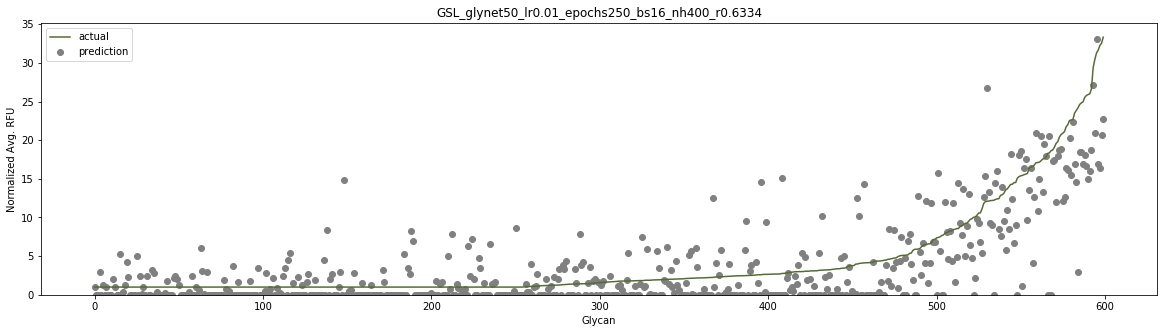

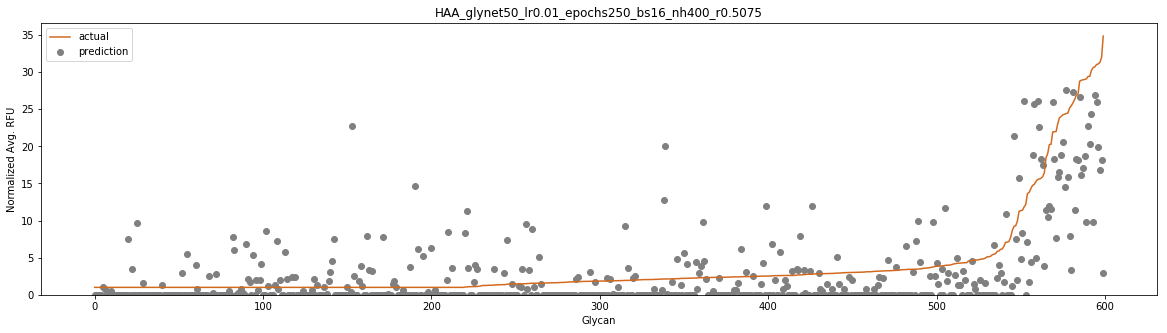

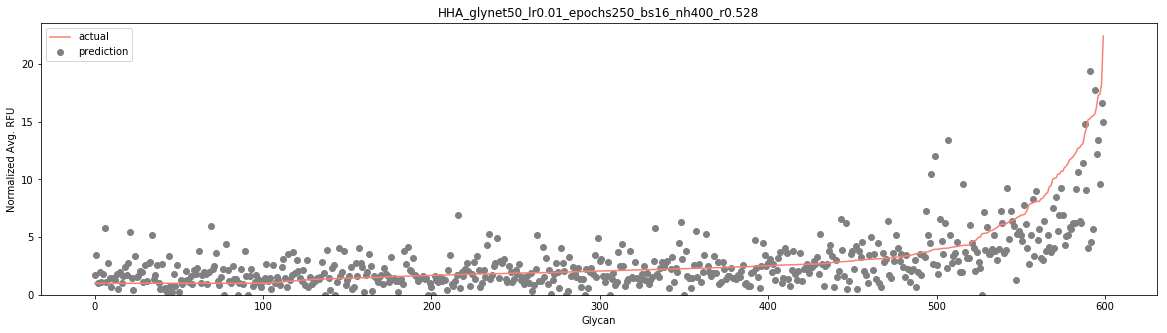

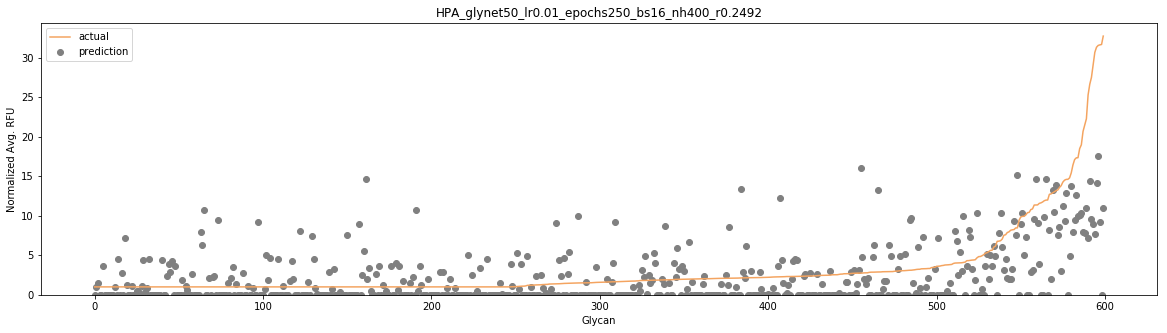

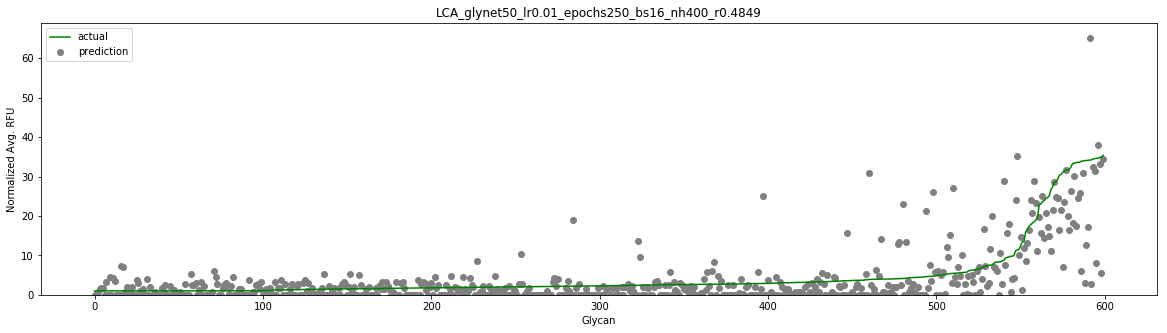

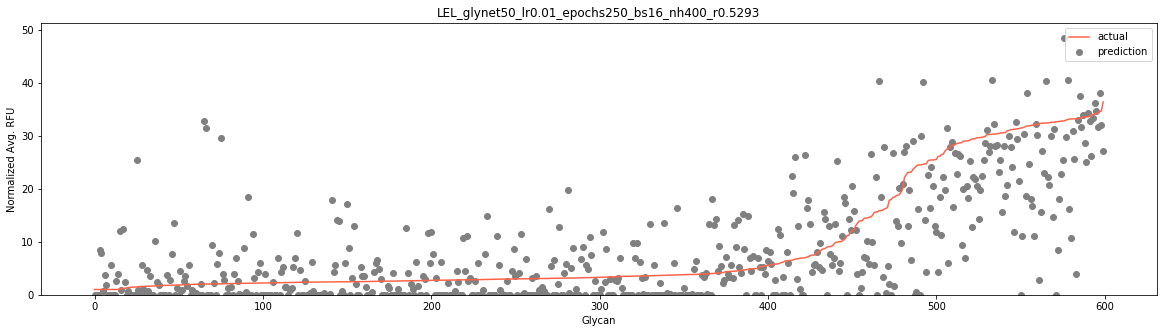

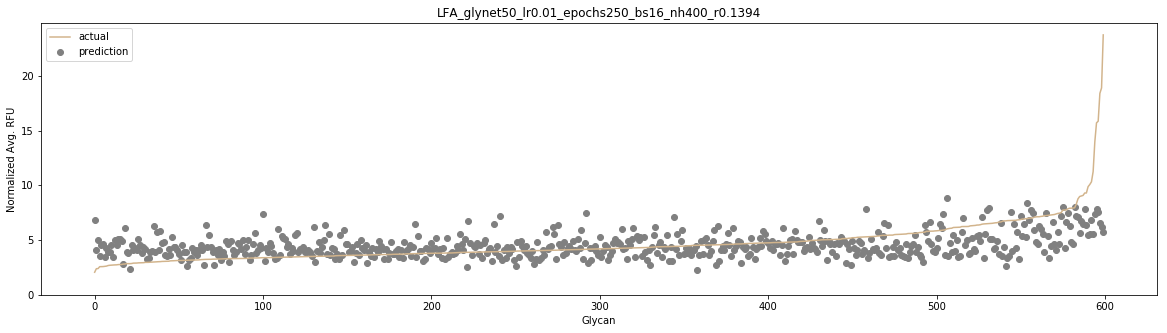

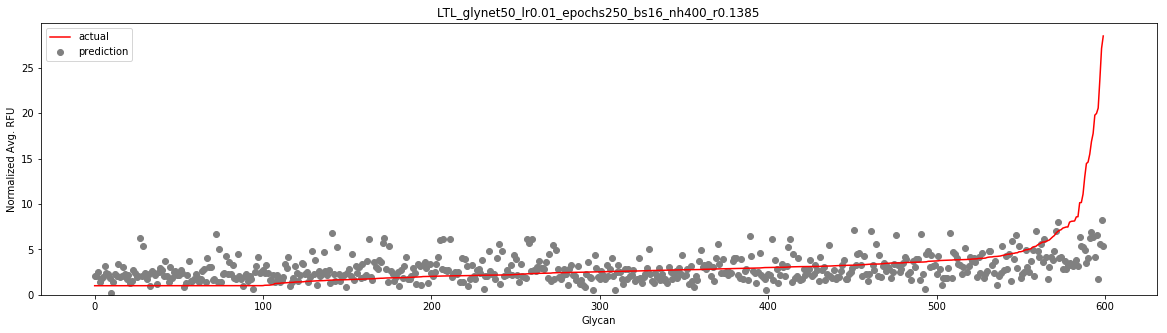

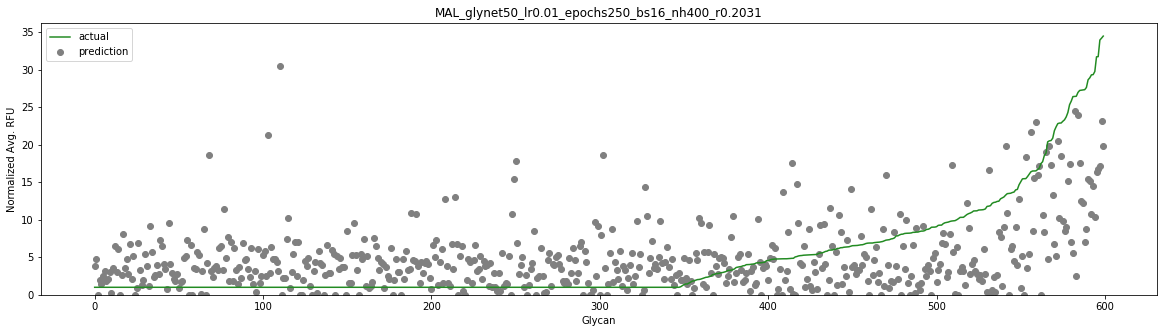

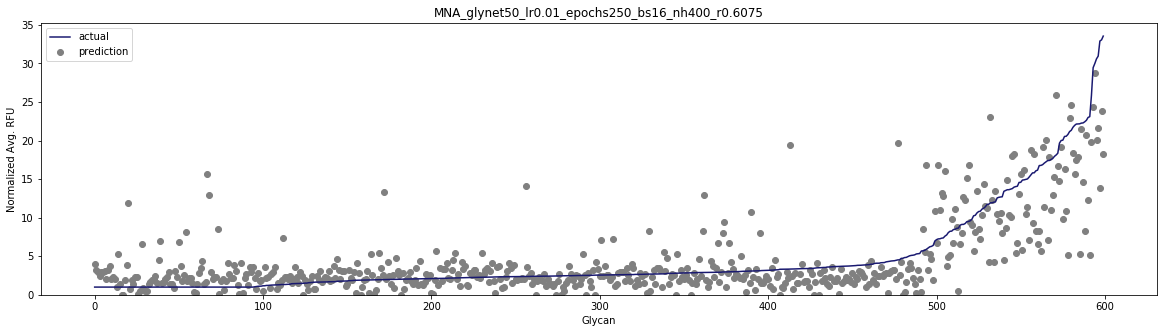

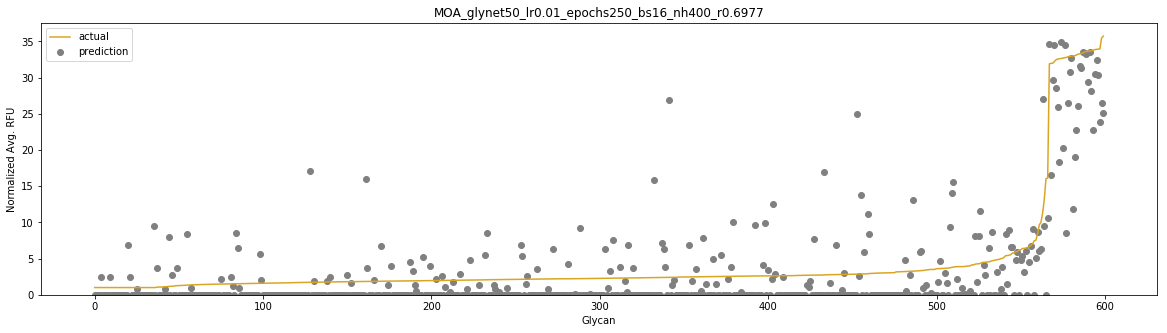

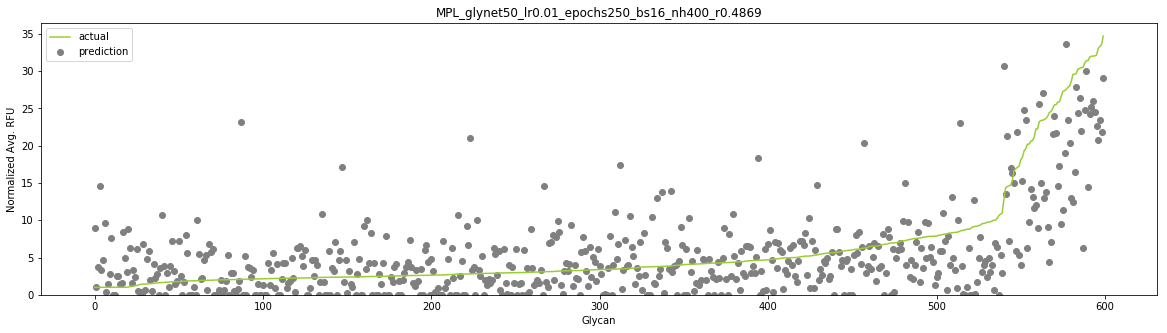

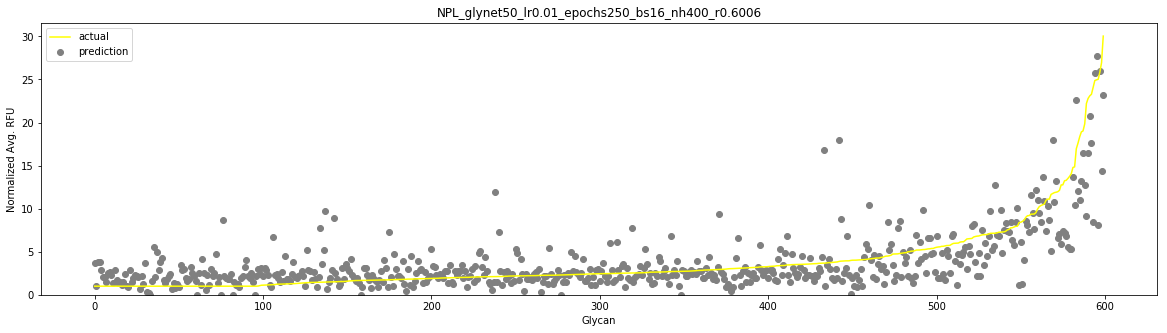

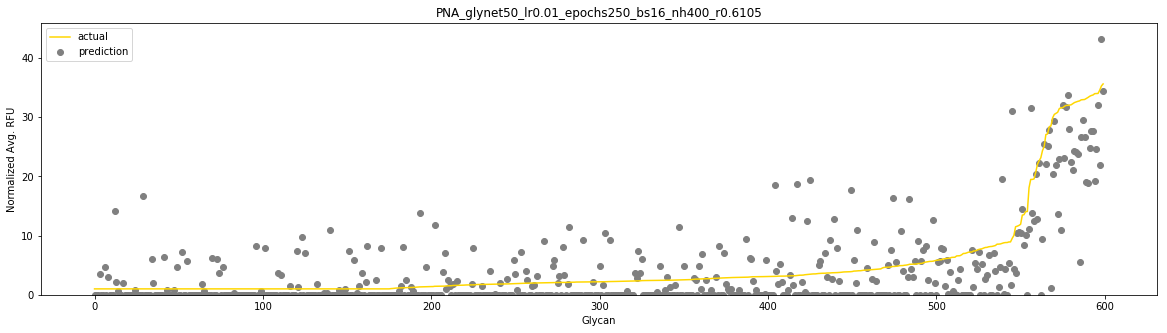

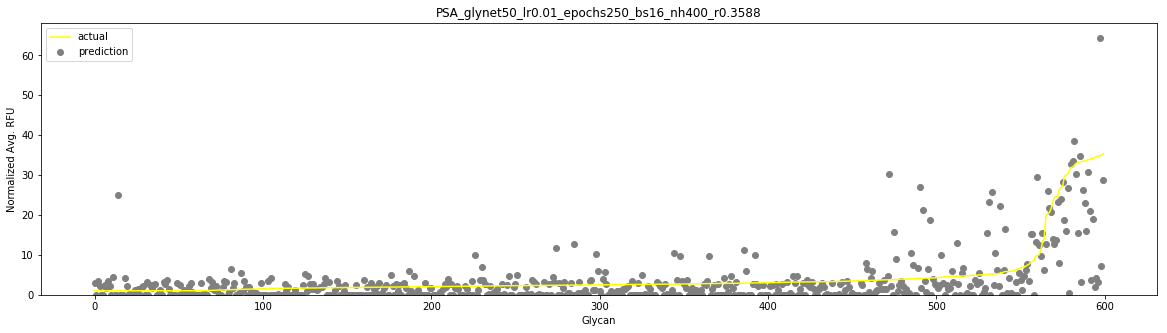

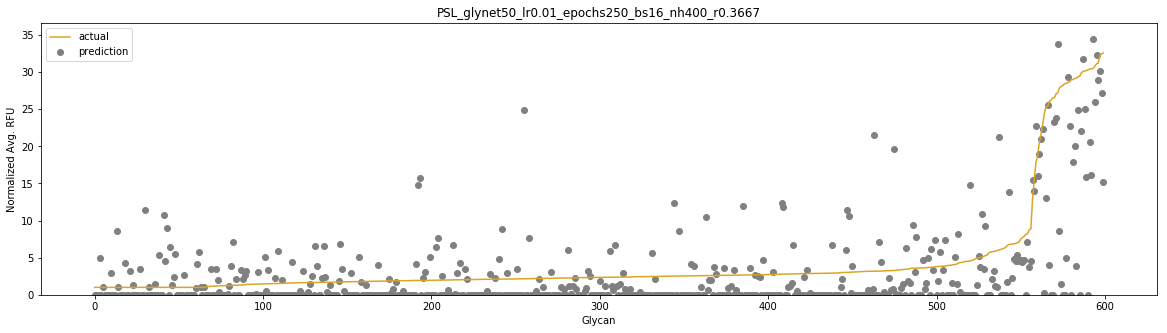

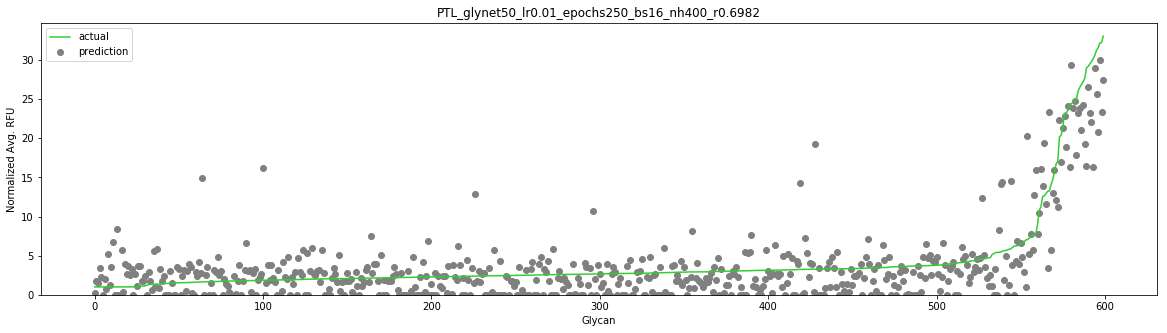

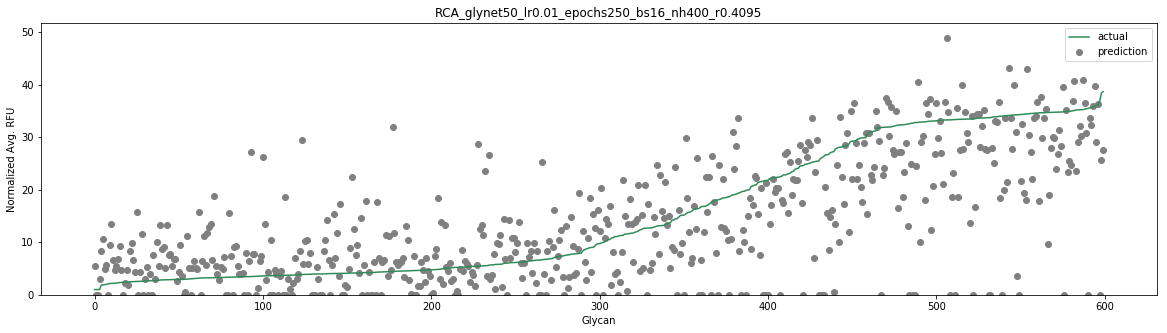

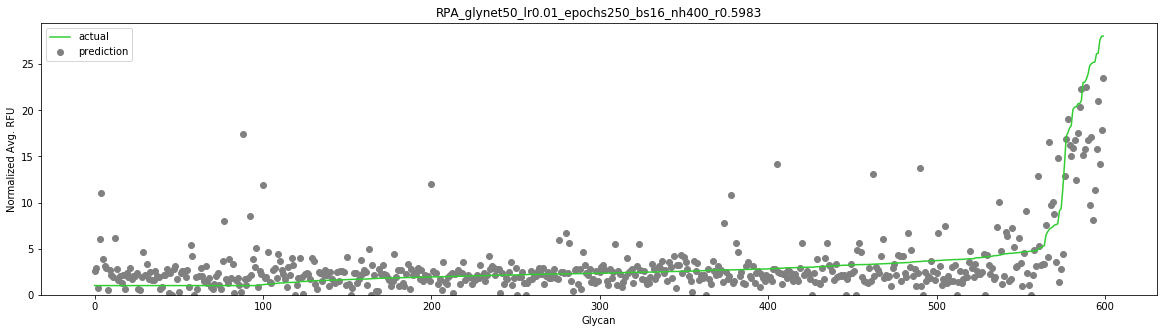

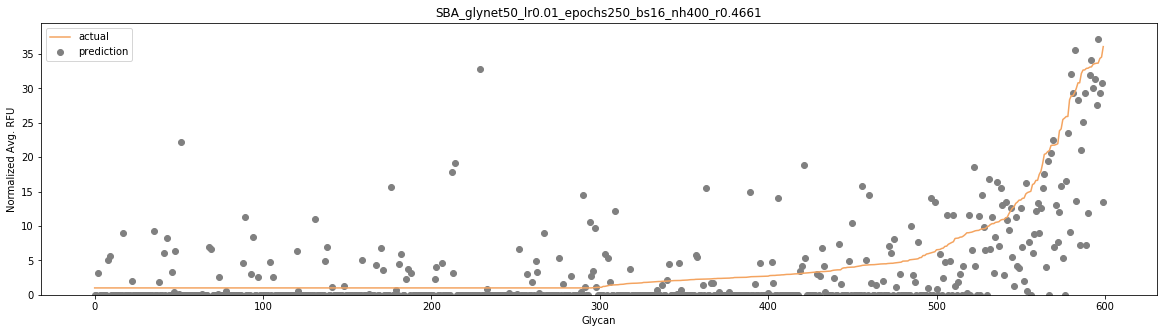

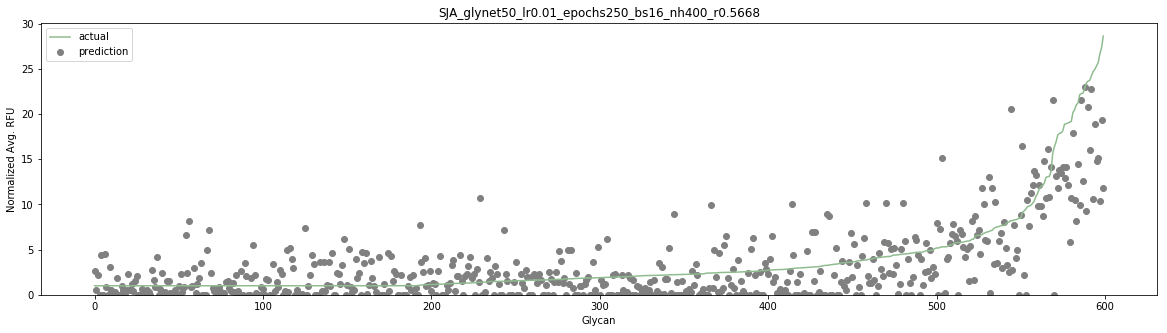

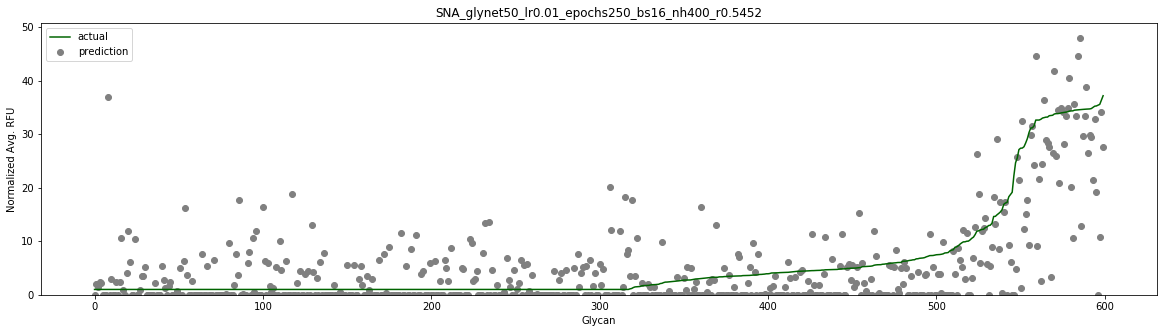

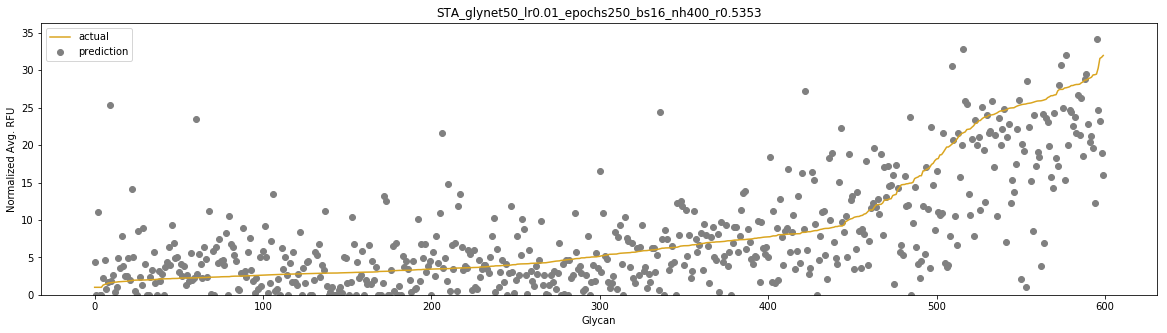

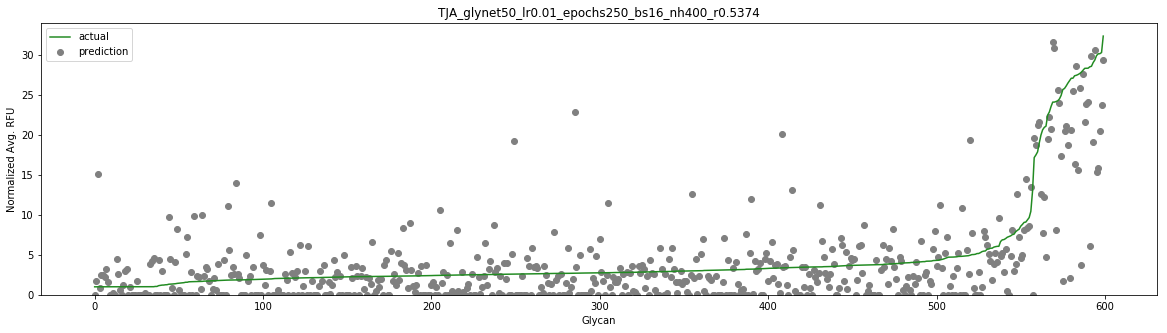

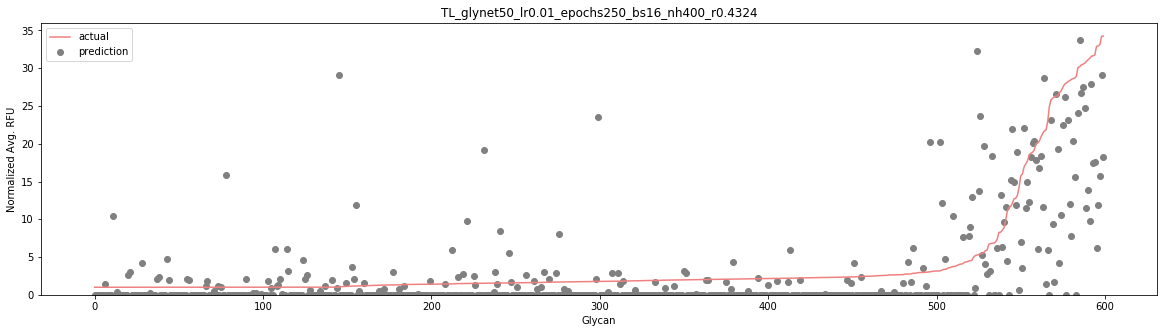

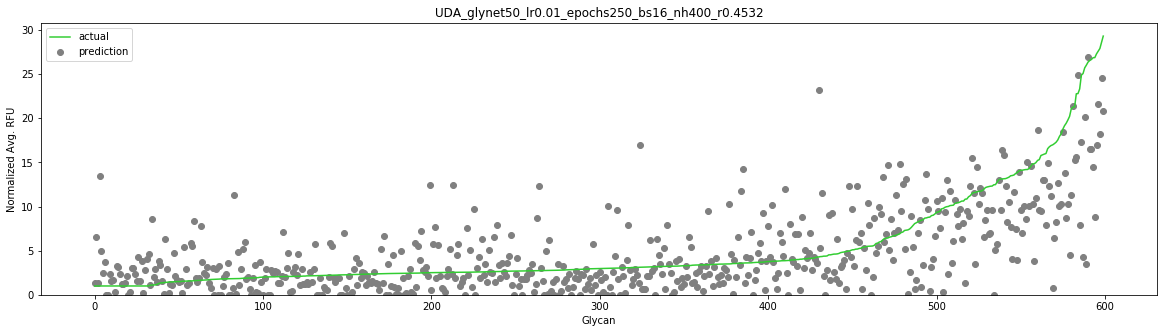

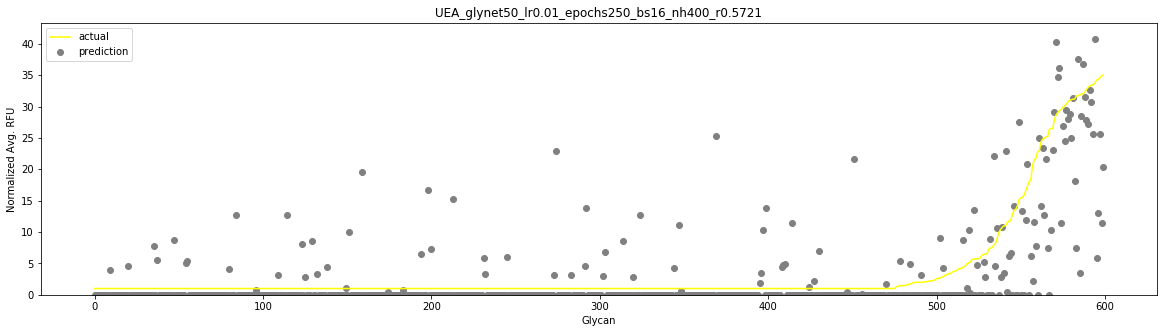

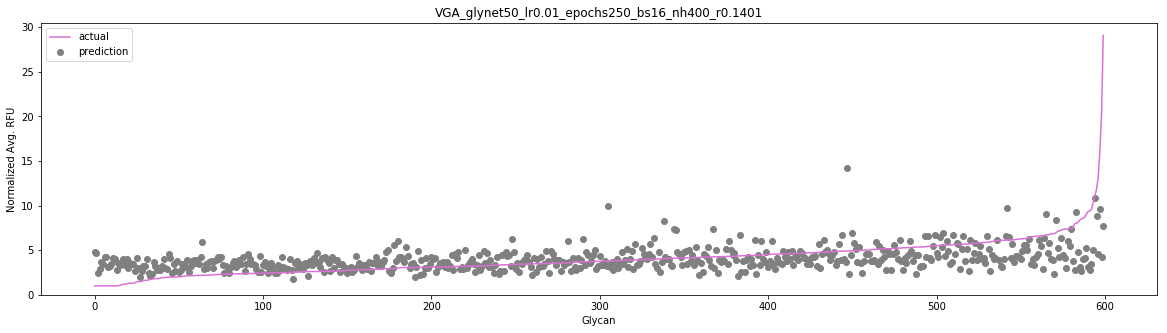

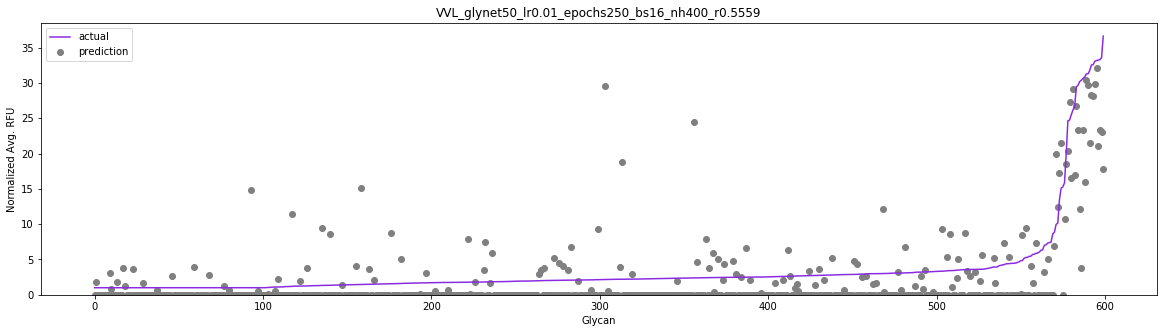

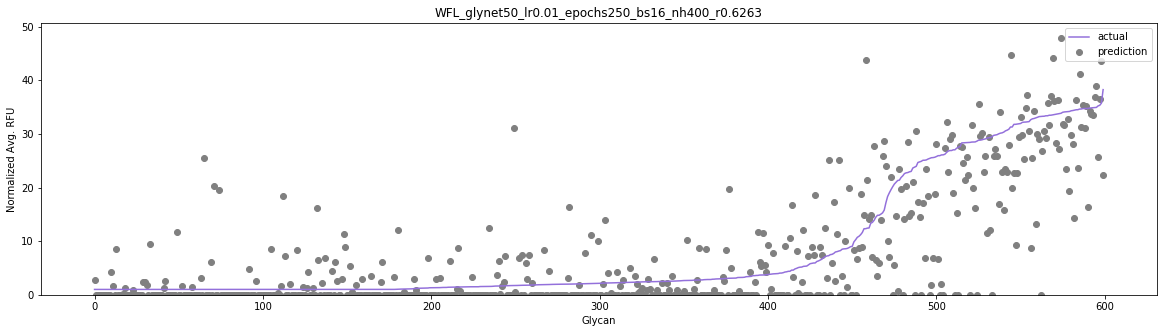

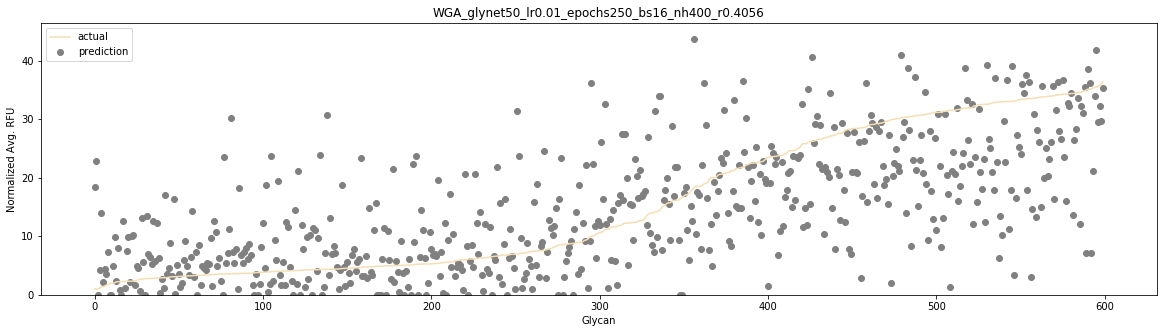

In [11]:
plot_scatter(proteins, results, experiment)